In [1]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from datetime import datetime

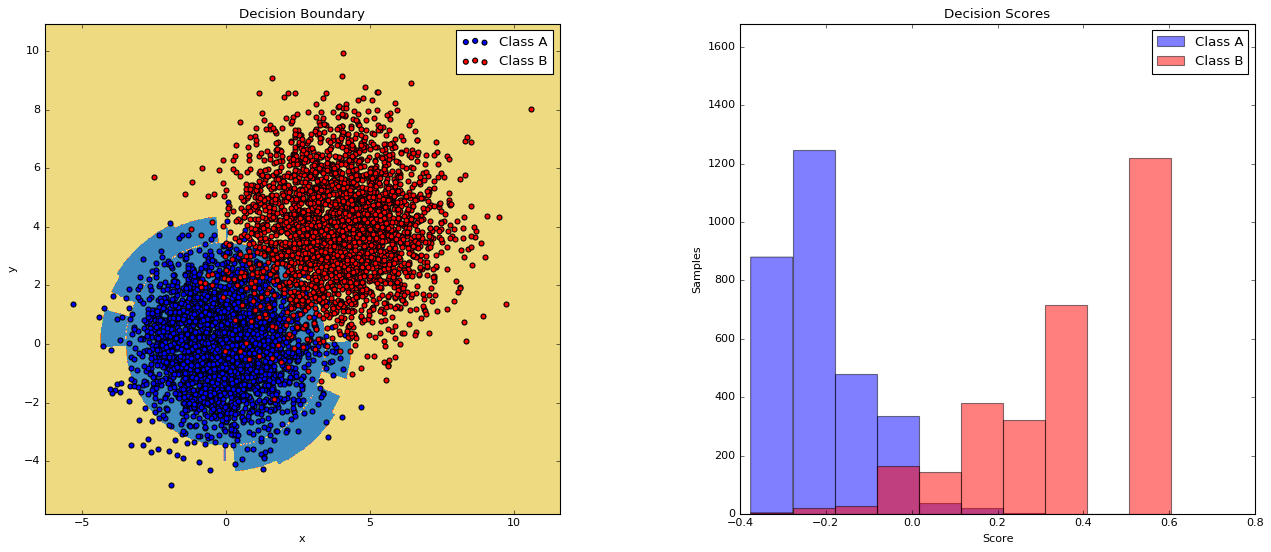

In [3]:
# Construct dataset
n_samples = 3000

X1, y1 = make_gaussian_quantiles(mean = (0,0), cov=2,
                                 n_samples=n_samples, n_features=2,
                                 n_classes=1, random_state=0)  #random.seed(datetime.now())

X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=3,
                                 n_samples=n_samples, n_features=2,
                                 n_classes=1, random_state=0)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2 + 1))

x_coord = X[:,0]
y_coord = X[:,1]

r = []
theta = []
r_theta = np.zeros((2*n_samples, 2))

# Calculate r and theta for each set of cartesian coordinates, then insert it into the empty arrays created above
for i in range(len(X)):
    r.append(np.sqrt(x_coord[i]**2 + y_coord[i]**2))
    theta.append(np.arctan(y_coord[i] / x_coord[i]))
    r_theta[:, 0][i] = r[i]
    r_theta[:, 1][i] = theta[i]
    
# Create an AdaBoosted decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

# Train the decision tree using a fit function
bdt.fit(r_theta, y) 

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(16, 7))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

xx_r, yy_r = xx.ravel(), yy.ravel()
rr = np.zeros(len(xx_r))
tt = np.zeros(len(xx_r))

for i in range(len(xx_r)):
    rr[i] = np.sqrt(xx_r[i]**2 + yy_r[i]**2)
    tt[i] = np.arctan(yy_r[i] / xx_r[i])

r_min, r_max = r_theta[:, 0].min() - 1, r_theta[:, 0].max() + 1
theta_min, theta_max = r_theta[:, 1].min() - 1, r_theta[:, 1].max() + 1
#rr, tt = np.meshgrid(np.arange(r_min, r_max, 0.0087),
                     #np.arange(theta_min, theta_max, 0.0087))

Z = bdt.predict(np.c_[rr, tt])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(r_theta)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()